In [89]:
import numpy as np
from scipy import stats
from scipy.stats import poisson, norm, ttest_ind
from numpy import inf
import matplotlib.pyplot as plt

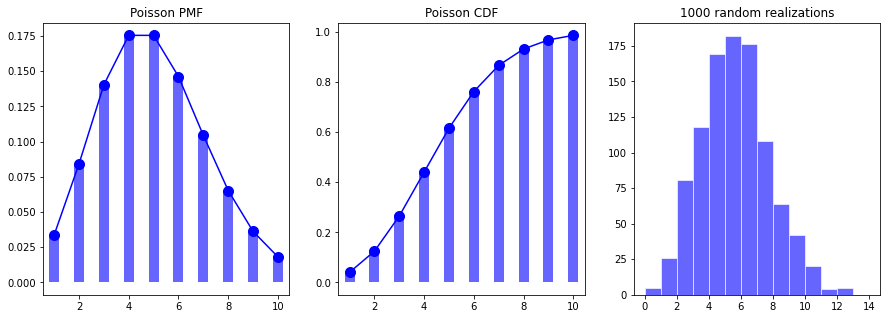

In [90]:
#a.
mu = 5
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(x, poisson.pmf(x, mu), 'bo-', ms=10, label='poisson pmf')
ax[0].vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=10, alpha=0.6)
ax[0].set_title('Poisson PMF')

ax[1].plot(x, poisson.cdf(x, mu), 'bo-', ms=10, label='poisson pmf')
ax[1].vlines(x, 0, poisson.cdf(x, mu), colors='b', lw=10, alpha=0.6)
ax[1].set_title('Poisson CDF')

yp = poisson.rvs(mu, size=1000)
poisson_bin = np.arange(0, mu*3, 1)  

ax[2].hist(yp, bins=poisson_bin, edgecolor='white', color = 'b', alpha=0.6)
ax[2].set_title('1000 random realizations');


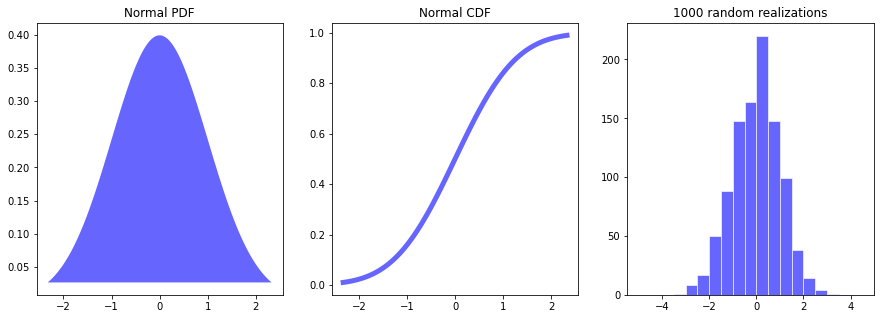

In [91]:
#b.
mean, var, skew, kurt = norm.stats(moments='mvsk')
x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].fill(x, norm.pdf(x), 'b-', lw=5, alpha=0.6, label='norm pdf')
ax[0].set_title('Normal PDF')

ax[1].plot(x, norm.cdf(x), 'b-', lw=5, alpha=0.6, label='norm cdf')
ax[1].set_title('Normal CDF')

yn = norm.rvs(size=1000)
norm_bin = np.arange(-5, 5, 0.5)  

ax[2].hist(yn, bins=norm_bin, edgecolor='white', color = 'b', alpha=0.6)
ax[2].set_title('1000 random realizations');

In [107]:
#c.
def ttest_output(a, b):
    result = ttest_ind(a, b)
    if result.pvalue < 0.05:
        print("H1: The variables come from different distributions.\n")
    else:
        print("H0: The variables come from the same distribution.\n")
        
print("Comparing a normal distribution to a Poisson:")
ttest_output(yn, yp)

print("Comparing two Poisson distributions with the same mu:")
yp2 = poisson.rvs(mu, size=1000)
ttest_output(yp, yp2)

print("Comparing two Poisson distributions with different mu:")
yp2 = poisson.rvs(3, size=1000)
ttest_output(yp, yp2)

print("Comparing two normal distributions with different mean:")
yn2 = norm.rvs(size=1000)*5
ttest_output(yn, yn2)

Comparing a normal distribution to a Poisson:
H1: The variables come from different distributions.

Comparing two Poisson distributions with the same mu:
H1: The variables come from different distributions.

Comparing two Poisson distributions with different mu:
H1: The variables come from different distributions.

Comparing two normal distributions with different mean:
H0: The variables come from the same distribution.

